# Module 5: Data Cleaning & Transformation

Real-world data is messy! In this module, we'll learn to clean and prepare data for analysis.

## Learning Objectives
- Identify and handle missing data
- Remove duplicates
- Convert data types
- Clean and manipulate text
- Work with dates and times
- Handle outliers

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

print("Libraries loaded!")

Libraries loaded!


## 1. Loading Messy Data

Let's work with survey data that has missing values and inconsistencies.

In [3]:
# Load survey data (intentionally messy!)
df_survey = pd.read_csv('../datasets/survey_results.csv', parse_dates=['submission_date'])

print("Survey data loaded!")
print(f"Shape: {df_survey.shape}")
print("\nFirst few rows:")
print(df_survey.head(10))

Survey data loaded!
Shape: (500, 11)

First few rows:
  response_id submission_date age_group  gender  satisfaction_score  \
0   RESP00250      2024-01-01     56-65    Male                 3.0   
1   RESP00102      2024-01-01     36-45    Male                 4.0   
2   RESP00351      2024-01-01     36-45  Female                 5.0   
3   RESP00222      2024-01-01     18-25  Female                 4.0   
4   RESP00124      2024-01-01     46-55    Male                 5.0   
5   RESP00110      2024-01-01     26-35    Male                 5.0   
6   RESP00238      2024-01-02     36-45  Female                 NaN   
7   RESP00384      2024-01-02       65+    Male                 5.0   
8   RESP00105      2024-01-02     36-45    Male                 3.0   
9   RESP00285      2024-01-03     18-25    Male                 NaN   

  product_quality customer_service would_recommend annual_income   region  \
0       Excellent        Excellent             Yes     $50k-$75k     West   
1         

In [ ]:
# Get overview of the data
print("Data Information:")
df_survey.info()

## 2. Identifying Missing Data

First step in data cleaning: find the missing values.

In [6]:
# Count missing values per column
print("Missing values per column:")
missing_counts = df_survey.isnull().sum()
missing_counts

Missing values per column:


response_id             0
submission_date         0
age_group              32
gender                 14
satisfaction_score     34
product_quality        27
customer_service       23
would_recommend        29
annual_income          43
region                  0
comments              155
dtype: int64

In [5]:
# Calculate percentage of missing values
print("\nMissing values percentage:")
missing_pct = (df_survey.isnull().sum() / len(df_survey) * 100).round(2)
missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)
print(missing_pct)


Missing values percentage:
comments              31.0
annual_income          8.6
satisfaction_score     6.8
age_group              6.4
would_recommend        5.8
product_quality        5.4
customer_service       4.6
gender                 2.8
dtype: float64


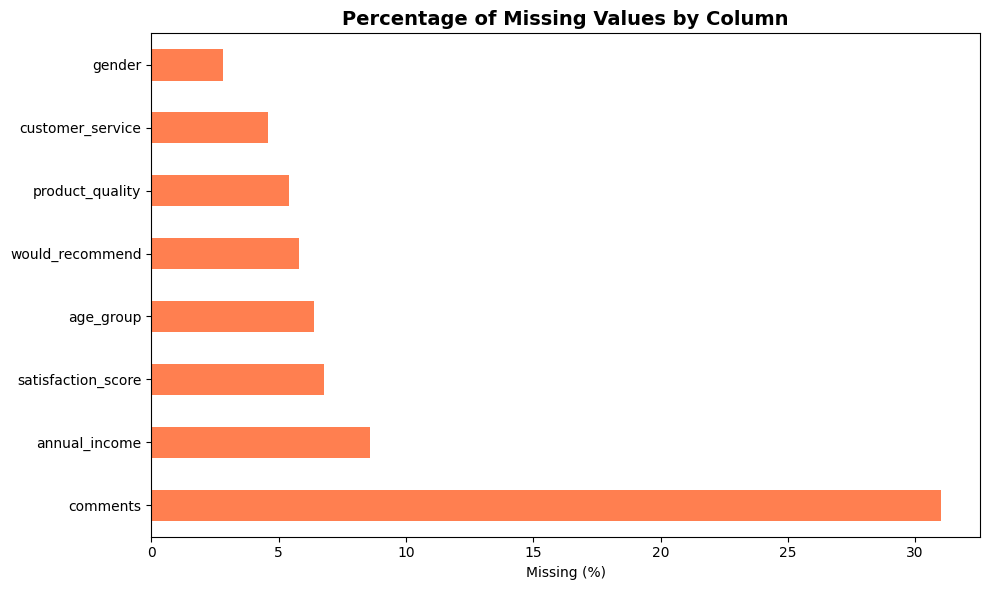

In [7]:
# Visualize missing data
plt.figure(figsize=(10, 6))
missing_pct.plot(kind='barh', color='coral')
plt.title('Percentage of Missing Values by Column', fontsize=14, fontweight='bold')
plt.xlabel('Missing (%)')
plt.tight_layout()
plt.show()

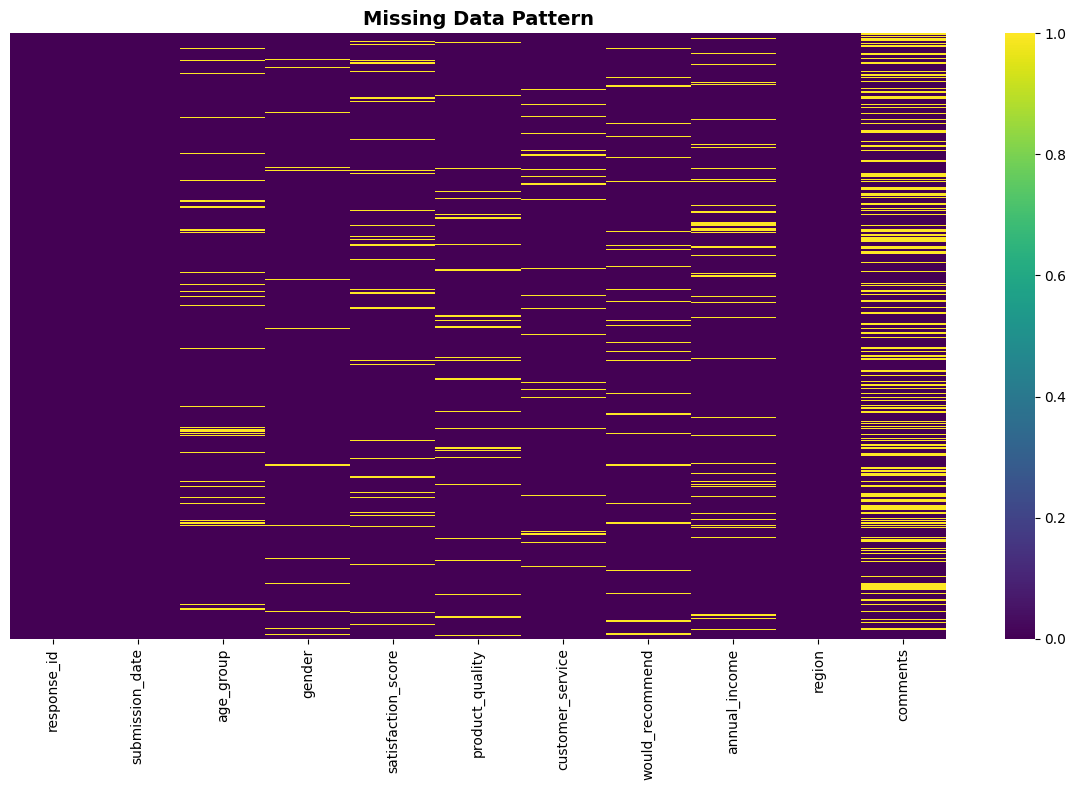

In [8]:
# Visual heatmap of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df_survey.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Data Pattern', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 3. Handling Missing Data

Different strategies for different situations.

In [ ]:
# Strategy 1: Drop rows with ANY missing values
df_complete = df_survey.dropna()
print(f"Original size: {len(df_survey)} rows")
print(f"After dropping all missing: {len(df_complete)} rows")
print(f"Lost {len(df_survey) - len(df_complete)} rows ({(1 - len(df_complete)/len(df_survey))*100:.1f}%)")

In [ ]:
# Strategy 2: Drop rows with missing values in specific columns
df_key_columns = df_survey.dropna(subset=['satisfaction_score', 'would_recommend'])
print(f"\nAfter dropping rows with missing satisfaction or recommendation: {len(df_key_columns)} rows")

In [ ]:
# Strategy 3: Fill missing values with a specific value
df_filled = df_survey.copy()
df_filled['comments'] = df_filled['comments'].fillna('No comment')
df_filled['age_group'] = df_filled['age_group'].fillna('Not specified')

print("\nAfter filling missing values:")
print(df_filled[['response_id', 'age_group', 'comments']].head(10))

In [ ]:
# Strategy 4: Fill with statistical measures
# For numerical data, use mean, median, or mode
df_numeric = df_survey.copy()

# Fill satisfaction_score with median
median_satisfaction = df_survey['satisfaction_score'].median()
df_numeric['satisfaction_score'] = df_survey['satisfaction_score'].fillna(median_satisfaction)

print(f"Filled satisfaction_score missing values with median: {median_satisfaction}")
print(f"Missing satisfaction scores: {df_numeric['satisfaction_score'].isnull().sum()}")

In [ ]:
# Strategy 5: Forward fill or backward fill (useful for time series)
df_ffill = df_survey.copy()
df_ffill['age_group'] = df_ffill['age_group'].fillna(method='ffill')

print("\nForward fill example:")
print(df_ffill[['response_id', 'age_group']].head(20))

## 4. Removing Duplicates

In [ ]:
# Check for duplicates
print(f"Total rows: {len(df_survey)}")
print(f"Duplicate rows: {df_survey.duplicated().sum()}")

In [ ]:
# Let's create some duplicates for demonstration
df_with_dupes = pd.concat([df_survey, df_survey.head(20)])
print(f"\nAfter adding duplicates: {len(df_with_dupes)} rows")
print(f"Duplicates: {df_with_dupes.duplicated().sum()}")

In [ ]:
# Remove duplicates
df_no_dupes = df_with_dupes.drop_duplicates()
print(f"\nAfter removing duplicates: {len(df_no_dupes)} rows")

In [ ]:
# Remove duplicates based on specific columns
df_no_dupes_subset = df_with_dupes.drop_duplicates(subset=['response_id'])
print(f"After removing duplicates by response_id: {len(df_no_dupes_subset)} rows")

## 5. Data Type Conversion

Ensure columns have the correct data types.

In [ ]:
# Check current data types
print("Current data types:")
print(df_survey.dtypes)

In [ ]:
# Load sales data for type conversion examples
df_sales = pd.read_csv('../datasets/sales_data.csv')
print("\nSales data types:")
print(df_sales.dtypes)

In [ ]:
# Convert date strings to datetime
df_sales['date'] = pd.to_datetime(df_sales['date'])
print("\nAfter converting date:")
print(df_sales.dtypes)
print(df_sales['date'].head())

In [ ]:
# Convert numeric columns stored as strings
# Create example with price as string
df_example = pd.DataFrame({
    'product': ['A', 'B', 'C'],
    'price': ['10.99', '25.50', '15.75'],
    'quantity': ['100', '200', '150']
})

print("Before conversion:")
print(df_example.dtypes)
print(df_example)

In [ ]:
# Convert to numeric
df_example['price'] = pd.to_numeric(df_example['price'])
df_example['quantity'] = pd.to_numeric(df_example['quantity'])

print("\nAfter conversion:")
print(df_example.dtypes)
print(df_example)

In [ ]:
# Convert to categorical (saves memory for repeated values)
df_sales['region'] = df_sales['region'].astype('category')
df_sales['payment_method'] = df_sales['payment_method'].astype('category')

print("\nAfter categorical conversion:")
print(df_sales.dtypes)
print(f"\nRegion categories: {df_sales['region'].cat.categories.tolist()}")

## 6. String Operations

Clean and manipulate text data.

In [ ]:
# Load customer data
df_customers = pd.read_csv('../datasets/customer_data.csv')
print("Customer names:")
print(df_customers[['first_name', 'last_name', 'email']].head(10))

In [ ]:
# Convert to lowercase
df_customers['email_lower'] = df_customers['email'].str.lower()
print("\nLowercase emails:")
print(df_customers[['email', 'email_lower']].head())

In [ ]:
# Convert to uppercase
df_customers['state_upper'] = df_customers['state'].str.upper()
print("\nUppercase states:")
print(df_customers[['state', 'state_upper']].head())

In [ ]:
# Strip whitespace
df_messy = pd.DataFrame({
    'name': ['  John  ', 'Mary   ', '  Bob']
})
df_messy['name_clean'] = df_messy['name'].str.strip()
print("\nBefore and after strip:")
print(df_messy)

In [ ]:
# Replace text
df_customers['email_domain'] = df_customers['email'].str.replace('email.com', 'company.com')
print("\nReplaced email domains:")
print(df_customers[['email', 'email_domain']].head())

In [ ]:
# Extract parts of strings
df_customers['email_username'] = df_customers['email'].str.split('@').str[0]
df_customers['email_domain_only'] = df_customers['email'].str.split('@').str[1]

print("\nSplit email:")
print(df_customers[['email', 'email_username', 'email_domain_only']].head())

In [ ]:
# Check if string contains text
df_customers['is_california'] = df_customers['state'].str.contains('CA')
print("\nCalifornia customers:")
print(df_customers[['first_name', 'last_name', 'state', 'is_california']].head(20))

In [ ]:
# String length
df_customers['name_length'] = df_customers['first_name'].str.len()
print("\nName lengths:")
print(df_customers[['first_name', 'name_length']].head(10))

## 7. Working with Dates and Times

In [ ]:
# Extract date components
df_sales['year'] = df_sales['date'].dt.year
df_sales['month'] = df_sales['date'].dt.month
df_sales['day'] = df_sales['date'].dt.day
df_sales['day_of_week'] = df_sales['date'].dt.day_name()
df_sales['quarter'] = df_sales['date'].dt.quarter

print("Date components:")
print(df_sales[['date', 'year', 'month', 'day', 'day_of_week', 'quarter']].head(10))

In [ ]:
# Calculate time differences
df_customers['signup_date'] = pd.to_datetime(df_customers['signup_date'])
df_customers['days_since_signup'] = (pd.Timestamp.now() - df_customers['signup_date']).dt.days

print("\nCustomer tenure:")
print(df_customers[['customer_id', 'signup_date', 'days_since_signup']].head(10))

In [ ]:
# Filter by date range
start_date = '2024-03-01'
end_date = '2024-06-30'

q2_sales = df_sales[(df_sales['date'] >= start_date) & (df_sales['date'] <= end_date)]
print(f"\nQ2 2024 sales: {len(q2_sales)} transactions")
print(f"Total Q2 revenue: ${q2_sales['total_amount'].sum():,.2f}")

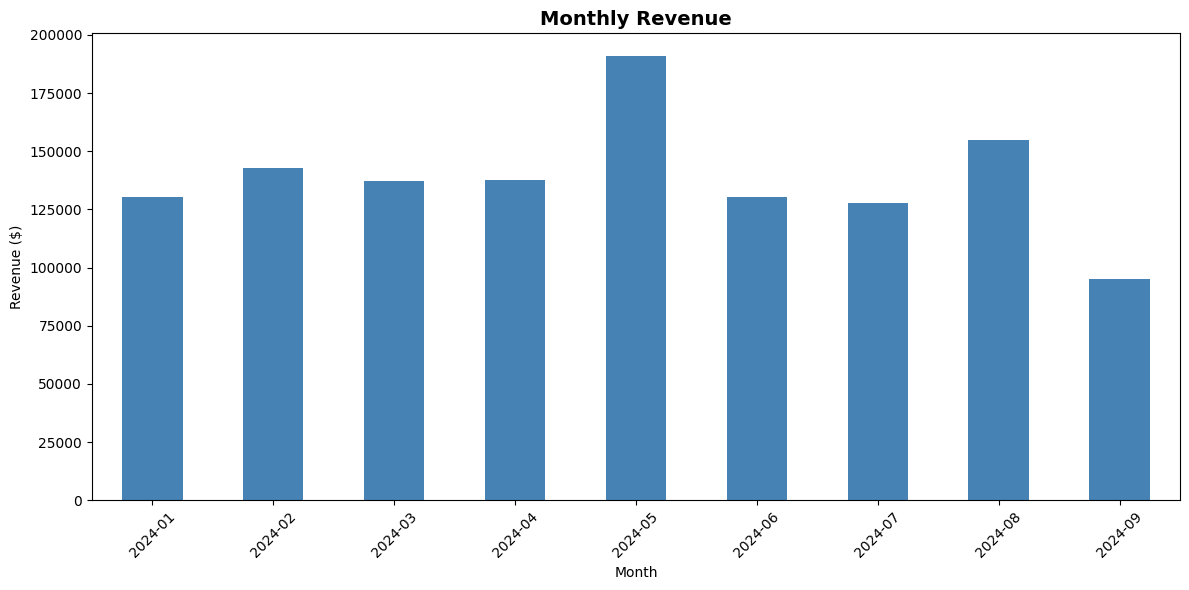

In [15]:
# Group by time periods
monthly_revenue = df_sales.groupby(df_sales['date'].dt.to_period('M'))['total_amount'].sum()

plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='bar', color='steelblue')
plt.title('Monthly Revenue', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 8. Handling Outliers

Identify and deal with extreme values.

In [ ]:
# Statistical summary to spot outliers
print("Sales amount statistics:")
print(df_sales['total_amount'].describe())

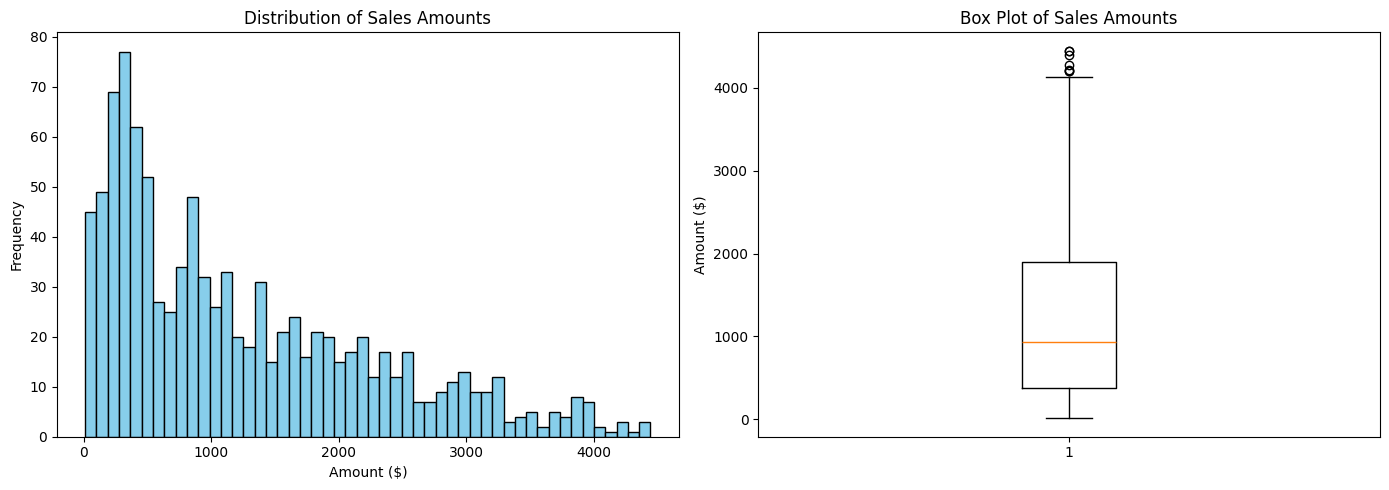

In [17]:
# Visualize distribution and outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
ax1.hist(df_sales['total_amount'], bins=50, color='skyblue', edgecolor='black')
ax1.set_title('Distribution of Sales Amounts')
ax1.set_xlabel('Amount ($)')
ax1.set_ylabel('Frequency')

# Box plot
ax2.boxplot(df_sales['total_amount'])
ax2.set_title('Box Plot of Sales Amounts')
ax2.set_ylabel('Amount ($)')

plt.tight_layout()
plt.show()

In [18]:
# Identify outliers using IQR method
Q1 = df_sales['total_amount'].quantile(0.25)
Q3 = df_sales['total_amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: ${Q1:.2f}")
print(f"Q3: ${Q3:.2f}")
print(f"IQR: ${IQR:.2f}")
print(f"Lower bound: ${lower_bound:.2f}")
print(f"Upper bound: ${upper_bound:.2f}")

outliers = df_sales[(df_sales['total_amount'] < lower_bound) | 
                     (df_sales['total_amount'] > upper_bound)]
print(f"\nNumber of outliers: {len(outliers)}")

Q1: $381.44
Q3: $1896.89
IQR: $1515.45
Lower bound: $-1891.73
Upper bound: $4170.07

Number of outliers: 7


In [19]:
# Remove outliers
df_no_outliers = df_sales[(df_sales['total_amount'] >= lower_bound) & 
                           (df_sales['total_amount'] <= upper_bound)]
print(f"Original size: {len(df_sales)}")
print(f"After removing outliers: {len(df_no_outliers)}")

Original size: 1000
After removing outliers: 993


In [20]:
# Alternative: Cap outliers instead of removing
df_capped = df_sales.copy()
df_capped['total_amount'] = df_capped['total_amount'].clip(lower=lower_bound, upper=upper_bound)

print("Outliers capped at bounds")
print(f"Max value before: ${df_sales['total_amount'].max():.2f}")
print(f"Max value after: ${df_capped['total_amount'].max():.2f}")

Outliers capped at bounds
Max value before: $4445.82
Max value after: $4170.07


## 9. Standardizing and Normalizing Data

In [21]:
# Z-score standardization
df_customers['ltv_zscore'] = (df_customers['lifetime_value'] - df_customers['lifetime_value'].mean()) / df_customers['lifetime_value'].std()

print("Standardized lifetime value:")
print(df_customers[['customer_id', 'lifetime_value', 'ltv_zscore']].head(10))

NameError: name 'df_customers' is not defined

In [ ]:
# Min-Max normalization (0 to 1)
df_customers['ltv_normalized'] = ((df_customers['lifetime_value'] - df_customers['lifetime_value'].min()) / 
                                   (df_customers['lifetime_value'].max() - df_customers['lifetime_value'].min()))

print("\nNormalized lifetime value:")
print(df_customers[['customer_id', 'lifetime_value', 'ltv_normalized']].head(10))

## 10. Complete Data Cleaning Pipeline

Putting it all together!

In [23]:
def clean_survey_data(df):
    """
    Complete data cleaning pipeline for survey data
    """
    print("Starting data cleaning pipeline...")
    print(f"Initial shape: {df.shape}")
    
    # Step 1: Remove complete duplicates
    df = df.drop_duplicates()
    print(f"After removing duplicates: {df.shape}")
    
    # Step 2: Handle missing values
    # Fill categorical columns
    df['age_group'] = df['age_group'].fillna('Not specified')
    df['gender'] = df['gender'].fillna('Not specified')
    df['comments'] = df['comments'].fillna('No comment')
    
    # Fill numeric columns with median
    df['satisfaction_score'] = df['satisfaction_score'].fillna(df['satisfaction_score'].median())
    
    # Drop rows with missing critical fields
    df = df.dropna(subset=['product_quality', 'customer_service', 'would_recommend'])
    print(f"After handling missing values: {df.shape}")
    
    # Step 3: Standardize text fields
    df['region'] = df['region'].str.upper()
    df['would_recommend'] = df['would_recommend'].str.upper()
    
    # Step 4: Convert data types
    df['satisfaction_score'] = df['satisfaction_score'].astype(int)
    
    # Step 5: Create derived fields
    df['is_satisfied'] = df['satisfaction_score'] >= 4
    df['submission_month'] = df['submission_date'].dt.to_period('M')
    
    print(f"Final shape: {df.shape}")
    print("\nCleaning complete!")
    
    return df

In [ ]:
# Apply cleaning pipeline
df_survey_clean = clean_survey_data(df_survey.copy())

print("\nCleaned data sample:")
print(df_survey_clean.head(10))

NameError: name 'clean_survey_data' is not defined

In [25]:
# Verify cleaning results
print("\nMissing values after cleaning:")
print(df_survey_clean.isnull().sum())


Missing values after cleaning:
response_id            0
submission_date        0
age_group              0
gender                 0
satisfaction_score     0
product_quality        0
customer_service       0
would_recommend        0
annual_income         40
region                 0
comments               0
is_satisfied           0
submission_month       0
dtype: int64


In [26]:
# Analyze cleaned data
print("\nSatisfaction distribution:")
print(df_survey_clean['satisfaction_score'].value_counts().sort_index())

print("\nRecommendation rate:")
print(df_survey_clean['would_recommend'].value_counts())


Satisfaction distribution:
satisfaction_score
1     26
2     35
3     76
4    184
5    103
Name: count, dtype: int64

Recommendation rate:
would_recommend
YES      271
MAYBE     87
NO        66
Name: count, dtype: int64


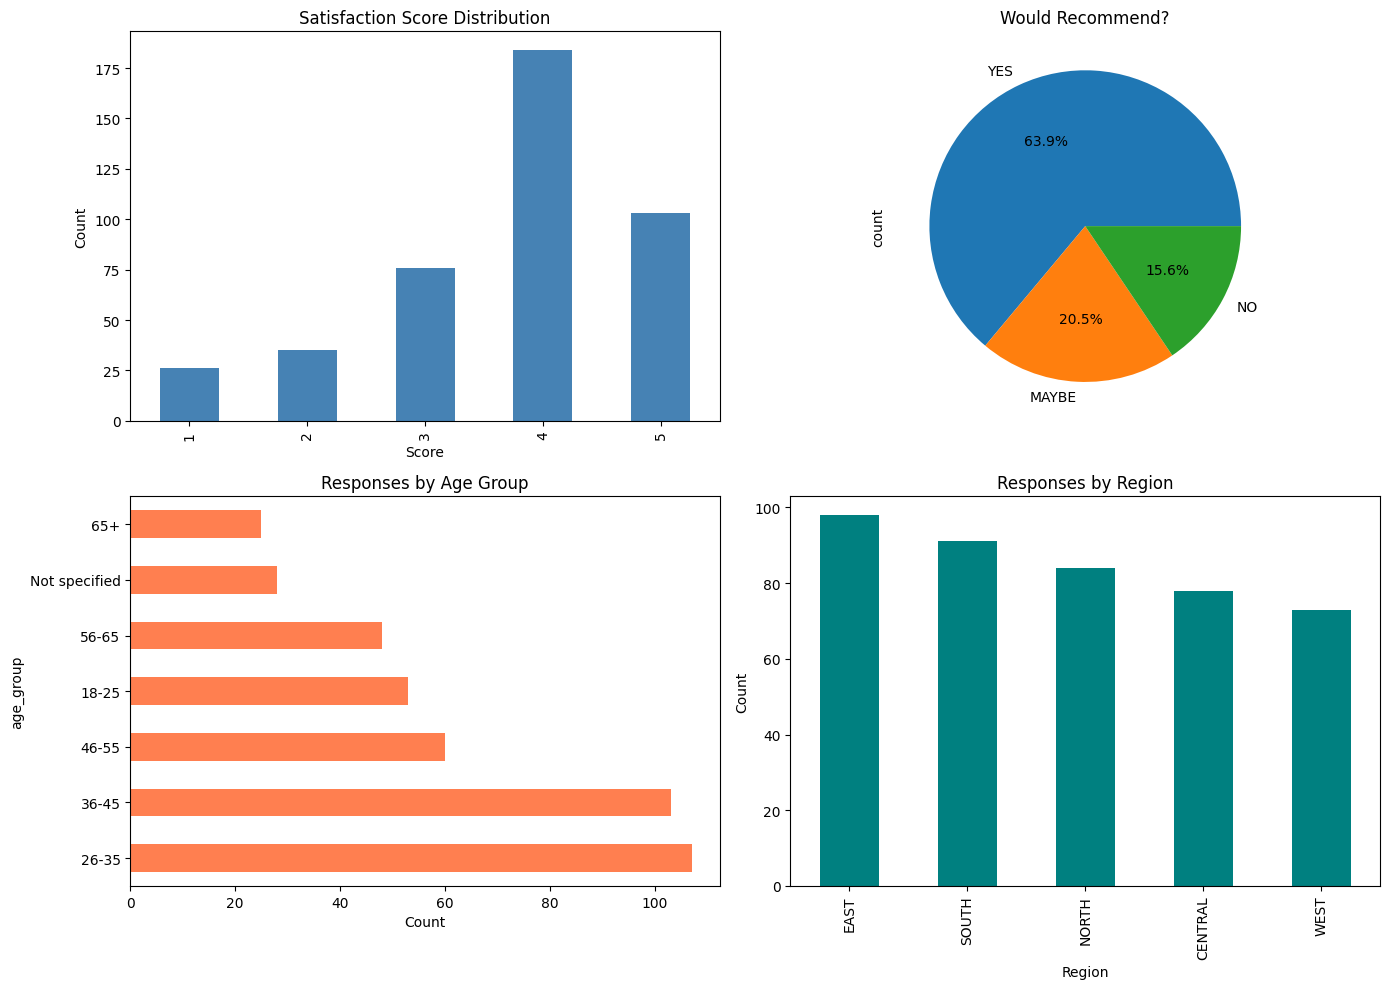

In [27]:
# Visualize cleaned data
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Satisfaction scores
df_survey_clean['satisfaction_score'].value_counts().sort_index().plot(kind='bar', ax=axes[0, 0], color='steelblue')
axes[0, 0].set_title('Satisfaction Score Distribution')
axes[0, 0].set_xlabel('Score')
axes[0, 0].set_ylabel('Count')

# Recommendation
df_survey_clean['would_recommend'].value_counts().plot(kind='pie', ax=axes[0, 1], autopct='%1.1f%%')
axes[0, 1].set_title('Would Recommend?')

# Age group
df_survey_clean['age_group'].value_counts().plot(kind='barh', ax=axes[1, 0], color='coral')
axes[1, 0].set_title('Responses by Age Group')
axes[1, 0].set_xlabel('Count')

# Region
df_survey_clean['region'].value_counts().plot(kind='bar', ax=axes[1, 1], color='teal')
axes[1, 1].set_title('Responses by Region')
axes[1, 1].set_xlabel('Region')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

## Practice Exercise

Clean the web traffic dataset!

In [29]:
# Load web traffic data
df_traffic = pd.read_csv('../datasets/web_traffic.csv')
print("Web traffic data:")
print(df_traffic.head())
print(f"\nShape: {df_traffic.shape}")
print("\nMissing values:")
print(df_traffic.isnull().sum())

Web traffic data:
      visit_id            timestamp              page_url  \
0  VISIT001178  2024-01-01 00:00:00                 /blog   
1  VISIT001577  2024-01-01 01:00:00                 /blog   
2  VISIT000779  2024-01-01 02:00:00       /product/sports   
3  VISIT001423  2024-01-01 05:00:00             /products   
4  VISIT000617  2024-01-01 09:00:00  /product/electronics   

   session_duration_sec device_type  browser  traffic_source    country  \
0                   394      Mobile   Chrome          Direct     France   
1                  1641     Desktop   Safari  Organic Search      Japan   
2                  1438      Tablet  Firefox        Paid Ads    Germany   
3                  1197      Mobile   Chrome          Direct      Japan   
4                  2710     Desktop   Chrome  Organic Search  Australia   

   bounce  conversion  page_views  
0    True       False           6  
1    True       False          17  
2   False       False          11  
3   False       Fals

In [30]:
# Exercise: Create cleaning pipeline
# 1. Convert timestamp to datetime
df_traffic['timestamp'] = pd.to_datetime(df_traffic['timestamp'])

# 2. Extract date components
df_traffic['hour'] = df_traffic['timestamp'].dt.hour
df_traffic['day_of_week'] = df_traffic['timestamp'].dt.day_name()

# 3. Categorize session duration
def categorize_session(duration):
    if duration < 60:
        return 'Short'
    elif duration < 300:
        return 'Medium'
    else:
        return 'Long'

df_traffic['session_category'] = df_traffic['session_duration_sec'].apply(categorize_session)

# 4. Analyze
print("\nTraffic by device type:")
print(df_traffic['device_type'].value_counts())

print("\nConversion rate by device:")
conversion_by_device = df_traffic.groupby('device_type')['conversion'].mean() * 100
print(conversion_by_device.round(2))


Traffic by device type:
device_type
Desktop    1053
Mobile      779
Tablet      168
Name: count, dtype: int64

Conversion rate by device:
device_type
Desktop    3.99
Mobile     3.85
Tablet     3.57
Name: conversion, dtype: float64


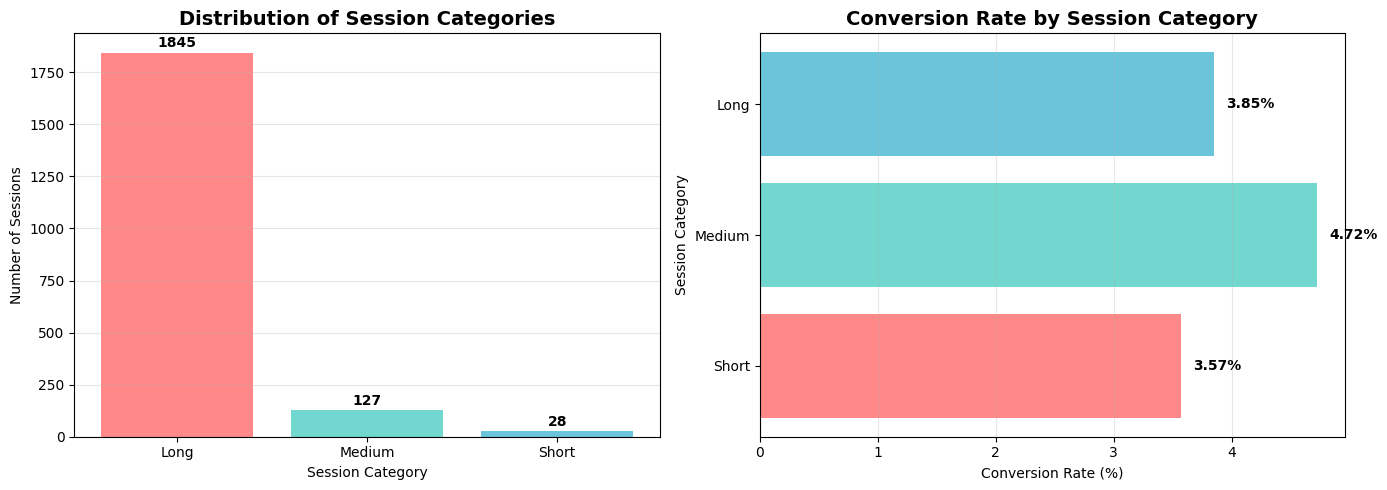


Session Category Summary:
Total sessions: 2000

Distribution:
  Short: 28 (1.4%)
  Medium: 127 (6.3%)
  Long: 1845 (92.2%)

Average conversion rate: 3.90%


In [32]:
# Visualize session categories
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Distribution of session categories
session_counts = df_traffic['session_category'].value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
ax1.bar(session_counts.index, session_counts.values, color=colors, alpha=0.8)
ax1.set_title('Distribution of Session Categories', fontsize=14, fontweight='bold')
ax1.set_xlabel('Session Category')
ax1.set_ylabel('Number of Sessions')
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, v in enumerate(session_counts.values):
    ax1.text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')

# Conversion rate by session category
conversion_by_category = df_traffic.groupby('session_category')['conversion'].mean() * 100
conversion_by_category = conversion_by_category.reindex(['Short', 'Medium', 'Long'])
ax2.barh(conversion_by_category.index, conversion_by_category.values, color=colors, alpha=0.8)
ax2.set_title('Conversion Rate by Session Category', fontsize=14, fontweight='bold')
ax2.set_xlabel('Conversion Rate (%)')
ax2.set_ylabel('Session Category')
ax2.grid(True, alpha=0.3, axis='x')

# Add value labels on bars
for i, v in enumerate(conversion_by_category.values):
    ax2.text(v + 0.1, i, f'{v:.2f}%', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSession Category Summary:")
print(f"Total sessions: {len(df_traffic)}")
print(f"\nDistribution:")
for category in ['Short', 'Medium', 'Long']:
    count = session_counts.get(category, 0)
    percentage = (count / len(df_traffic)) * 100
    print(f"  {category}: {count} ({percentage:.1f}%)")
print(f"\nAverage conversion rate: {df_traffic['conversion'].mean() * 100:.2f}%")


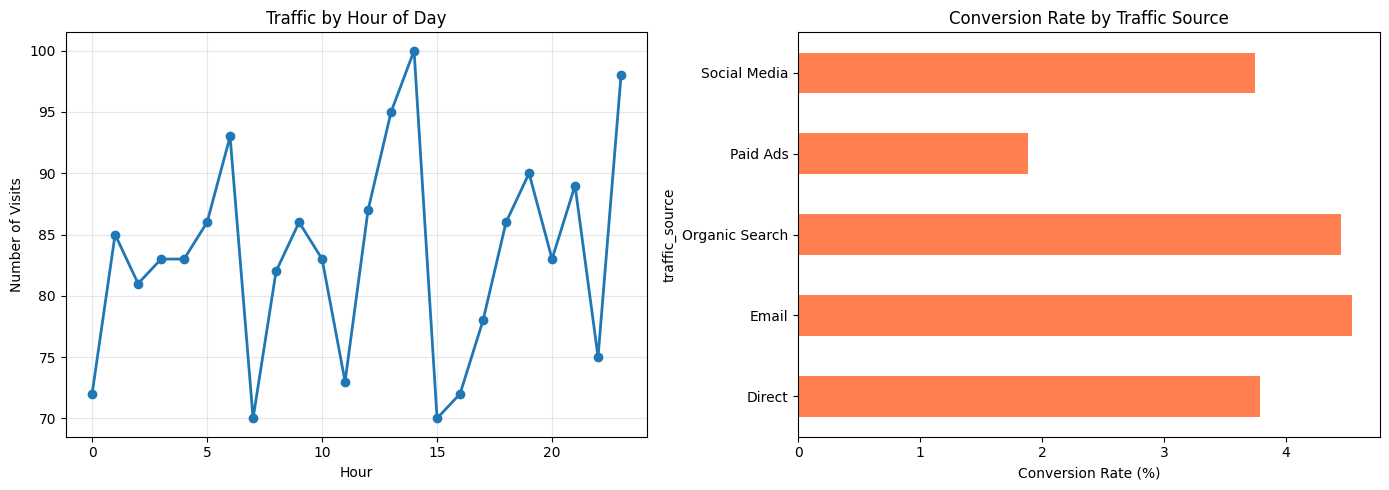

In [31]:
# Visualize traffic patterns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Traffic by hour
hourly_traffic = df_traffic.groupby('hour').size()
ax1.plot(hourly_traffic.index, hourly_traffic.values, marker='o', linewidth=2)
ax1.set_title('Traffic by Hour of Day')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Number of Visits')
ax1.grid(True, alpha=0.3)

# Conversion by traffic source
conversion_by_source = df_traffic.groupby('traffic_source')['conversion'].mean() * 100
conversion_by_source.plot(kind='barh', ax=ax2, color='coral')
ax2.set_title('Conversion Rate by Traffic Source')
ax2.set_xlabel('Conversion Rate (%)')

plt.tight_layout()
plt.show()

## Summary

In this module, you learned:

✓ **Identifying Missing Data**: Find and visualize missing values  
✓ **Handling Missing Data**: Drop, fill, or interpolate  
✓ **Removing Duplicates**: Clean duplicate records  
✓ **Data Type Conversion**: Ensure correct types  
✓ **String Operations**: Clean and manipulate text  
✓ **Date/Time Operations**: Parse and extract date components  
✓ **Handling Outliers**: Identify and treat extreme values  
✓ **Normalization**: Scale data for analysis  
✓ **Complete Pipeline**: Put it all together

### Quick Reference

```python
# Missing data
df.isnull().sum()
df.dropna()
df.fillna(value)

# Duplicates
df.duplicated()
df.drop_duplicates()

# Type conversion
pd.to_datetime()
pd.to_numeric()
df['col'].astype('category')

# String operations
df['col'].str.lower()
df['col'].str.strip()
df['col'].str.replace()
df['col'].str.contains()

# Date operations
df['date'].dt.year
df['date'].dt.month
df['date'].dt.day_name()
```

Next up: **Module 6 - Automating Data Pipelines**!